In [7]:
import importlib
import SFFI.util_plot as ut 
import matplotlib.pyplot as plt
from script_figure import plot_error_and_accuracy
from script_figure import plot_time_vs_key
from _helper._load_csv import aggreagate_csv_from_cluster
from script_figure import plot_trajectory
from simulation_models import lotka_volterra
import os
from script_figure import plot_error_dim_OU as plot_error_dim
from script_figure import labels_plot
from script_figure import _helper_draw_graph as hdg
import matplotlib.gridspec as gridspec
import script_figure.helper_figure as hf
importlib.reload(labels_plot)

ut.set_favorite_plot_config()
aggreagate_csv_from_cluster(select_file="lotka_volterra", path=os.path.abspath('') + "/csv")
model_class = lotka_volterra.LotkaVolterra

Look in  /home/andonis/These/Jupyter/PASTIS_PRL_github/csv
['lotka_volterra_dim_7_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_diffusion_strength.pkl', 'large_deviation_dim_8.pkl', 'large_deviation_dim_3.pkl', 'large_deviation_dim_6.pkl', 'OrnsteinUhlenbeck_dim_10_n.pkl', 'lotka_volterra_dim_7_benchmark_sindy_n.pkl', 'lorenz_critical_constant_noise_p_n.pkl', 'Misspecified_model_figure_1_diffusion_strength.pkl', 'lotka_volterra_dim_7_p_n.pkl', 'grayscott_dt.pkl', 'OrnsteinUhlenbeck_p_dim_10_n.pkl', 'grayscott_n.pkl', 'grayscott_p_n.pkl', 'grayscott_diffusion_strength.pkl', 'lorenz_critical_constant_noise_n.pkl', 'lorenz_critical_constant_noise_experimental_noise.pkl', 'lorenz_critical_constant_noise_diffusion_vs_time_diffusion_strength.pkl', 'lotka_volterra_dim_7_diffusion_strength.pkl', 'lorenz_critical_constant_noise_dt.pkl', 'large_deviation_dim_7.pkl', 'large_deviation_dim_9.pkl', 'large_deviation_dim_10.pkl', 'large_deviation_dim_5.pkl

In [8]:
def add_letter(ax, letter):
    ax.text(-0.1, 1.2, "(" + letter + ")", transform=ax.transAxes, fontsize=14, va='top', ha='left')

name_csv_base = "lotka_volterra_dim_7"
name_csv_time = name_csv_base + "_n.pkl" 
#name_csv_time =  name_csv_base + "_n.csv"
name_csv_D_strength = name_csv_base + "_diffusion_strength.pkl"
name_csv_experimental_noise = name_csv_base + "_experimental_noise.pkl"
name_csv_dt = name_csv_base + "_dt.pkl"

method_to_plot = ["AIC", "BIC", "PASTIS", "CV",
                   "Total_model",  r"$\text{PASTIS}_p$"] # "GRIC p=0.1", "GRIC p=0.01", "GRIC p=0.001"
l_y_plot = ["Exact_model_found", "Accuracy_model","ratio_error_real_model_predictive"]

n_rows, n_cols = 3, 3
n_rows = max(n_rows, len(l_y_plot))
fig = plt.figure(figsize=ut.set_size(width="article", fraction=2, subplots=(n_rows, n_cols)),
                 layout='constrained')
gs = fig.add_gridspec(nrows=n_rows, ncols=n_cols)

axs = plot_error_and_accuracy.plot_from_csv(name_csv_time, 
                                  parameter="time",
                                  method_to_plot=method_to_plot,
                                  axs=[fig.add_subplot(gs[i, 0]) for i in range(len(l_y_plot))],
                                  l_y_plot=l_y_plot,
                                  )

axs = plot_error_and_accuracy.plot_from_csv(name_csv_D_strength, 
                                  parameter="D_strength",
                                  method_to_plot=method_to_plot,
                                   l_y_plot=l_y_plot,
                                   axs=[fig.add_subplot(gs[i, 1]) for i in range(len(l_y_plot))],
                                   )

axs = plot_error_and_accuracy.plot_from_csv(name_csv_dt, 
                                  parameter="dt",
                                  method_to_plot=method_to_plot,
                                   l_y_plot=l_y_plot,
                                   axs=[fig.add_subplot(gs[i, 2]) for i in range(len(l_y_plot))],
                                   )
# add_letter(axs[0], "c")
# add_letter(axs[1], "f")

# bax = plot_trajectory.plot_trajectory_Lotka_Volterra(name_csv_time, model_class, subplot_spec=gs[0, 0], parameter="time", parameters_value_plot=[200])
# add_letter(bax.axs[0], "a")

#plt.savefig("figures/lotka_volterra.png", dpi=1000, bbox_inches='tight')
fig.suptitle("Competitive Lotka-Volterra model : %s"%name_csv_time)

[Errno 2] No such file or directory: 'lotka_volterra_dim_7_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lotka_volterra_dim_7_n.pkl'
(0.6444993332001944, 7.523317823856277)
[Errno 2] No such file or directory: 'lotka_volterra_dim_7_diffusion_strength.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lotka_volterra_dim_7_diffusion_strength.pkl'
(0.9760349019307594, 1.664284986570939)
[Errno 2] No such file or directory: 'lotka_volterra_dim_7_dt.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lotka_volterra_dim_7_dt.pkl'
(0.9805825481852105, 1.5094983650105642)


Text(0.5, 0.98, 'Competitive Lotka-Volterra model : lotka_volterra_dim_7_n.pkl')

In [9]:
from script_cluster.Lotka_Volterra_simple import model
from SFFI.simulation import simulate
from SFFI import sffi, SBR_progression as l

para_simu = model.get_parameter_simulation()
x_train, dt = simulate(**para_simu)
total_base = model.total_base

n_1 = 10**3
n_2 = 10**4
n_3 = 5*10**4

inf_n_1 = sffi.SFFI(total_base, x_train[:n_1], dt, use_jax=True, diffusion="Constant")
inf_n_2 = sffi.SFFI(total_base, x_train[:n_2], dt, use_jax=True, diffusion="Constant")
inf_n_3 = sffi.SFFI(total_base, x_train[:n_3], dt, use_jax=True, diffusion="Constant")

model_l0_n_1 = l.L0_SBR(inf_n_1)
print("         " + str(model.index_real_base))
model_l0_n_1.print_top_best_nodes(use_name_base=False)

model_l0_n_2 = l.L0_SBR(inf_n_2)
print("         " + str(model.index_real_base))
model_l0_n_2.print_top_best_nodes(use_name_base=False)

model_l0_n_3 = l.L0_SBR(inf_n_3)
print("         " + str(model.index_real_base))
model_l0_n_3.print_top_best_nodes(use_name_base=False)

         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 16, 21, 22, 23, 24, 25, 30, 31, 32, 37, 38, 39, 40, 46, 47, 48, 49, 54, 55]
 Top set ()
Best Set () : info = 0.0 penalty 0.0
     Set (7, 49) : info = -9.733625034739903 penalty 21.866213939434573
     Set (7,) : info = -9.876926872409745 penalty 10.933106969717286
     Set (7, 14, 49) : info = -19.312348354121248 penalty 32.79932090915186
     Set (4, 7, 39, 49) : info = -28.790237892284832 penalty 43.732427878869146
     Set (7, 22, 26, 47, 49) : info = -38.91858106839687 penalty 54.66553484858643
     Set (7, 23, 32, 33, 46, 49) : info = -49.067713174053104 penalty 65.59864181830372
     Set (4, 7, 33, 40, 47, 49, 50) : info = -61.313786696455956 penalty 76.531748788021
     Set (4, 7, 19, 23, 36, 39, 49, 54) : info = -71.7592194208941 penalty 87.46485575773829
     Set (3, 5, 7, 17, 22, 34, 38, 47, 49) : info = -80.20859778344108 penalty 98.39796272745558
     Set (3, 7, 17, 22, 24, 26, 34, 38, 47, 49) : info = -90.43607724163576 

In [10]:
model_l0_n_3.compute_information(model_l0_n_3.best_nodes)

2097.711711085151

In [11]:
model_l0_n_3.compute_information(tuple(model.index_real_base))

2097.711711085151

[Errno 2] No such file or directory: 'lotka_volterra_dim_7_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lotka_volterra_dim_7_n.pkl'
{'A': [[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, -1.0], [-1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [1.0, -1.0, 1.0, 1.0, 1.0, 0.0, 0.0], [0.0, 0.0, -1.0, 1.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, -1.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0]], 'r': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'simple_base': True, 'diffusion_constant': False, 'r_in_prefactor': True, 'kwargs': {'diffusion_strength': 0.05, 'dt': 0.01, 'n': 1000000}}
index real base 32
total base 56
[Errno 2] No such file or directory: 'lotka_volterra_dim_7_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lotka_volterra_dim_7_n.pkl'
method in csv avalaible ['Real_model_Ito_A_True_diffusion_Constant'
 'Total_model_Ito_A_True_diffusion_Constant'
 'PASTIS_p_0.001_Ito_A_True_diffusion_Constant'
 'PASTIS_p_0.001_Ito P

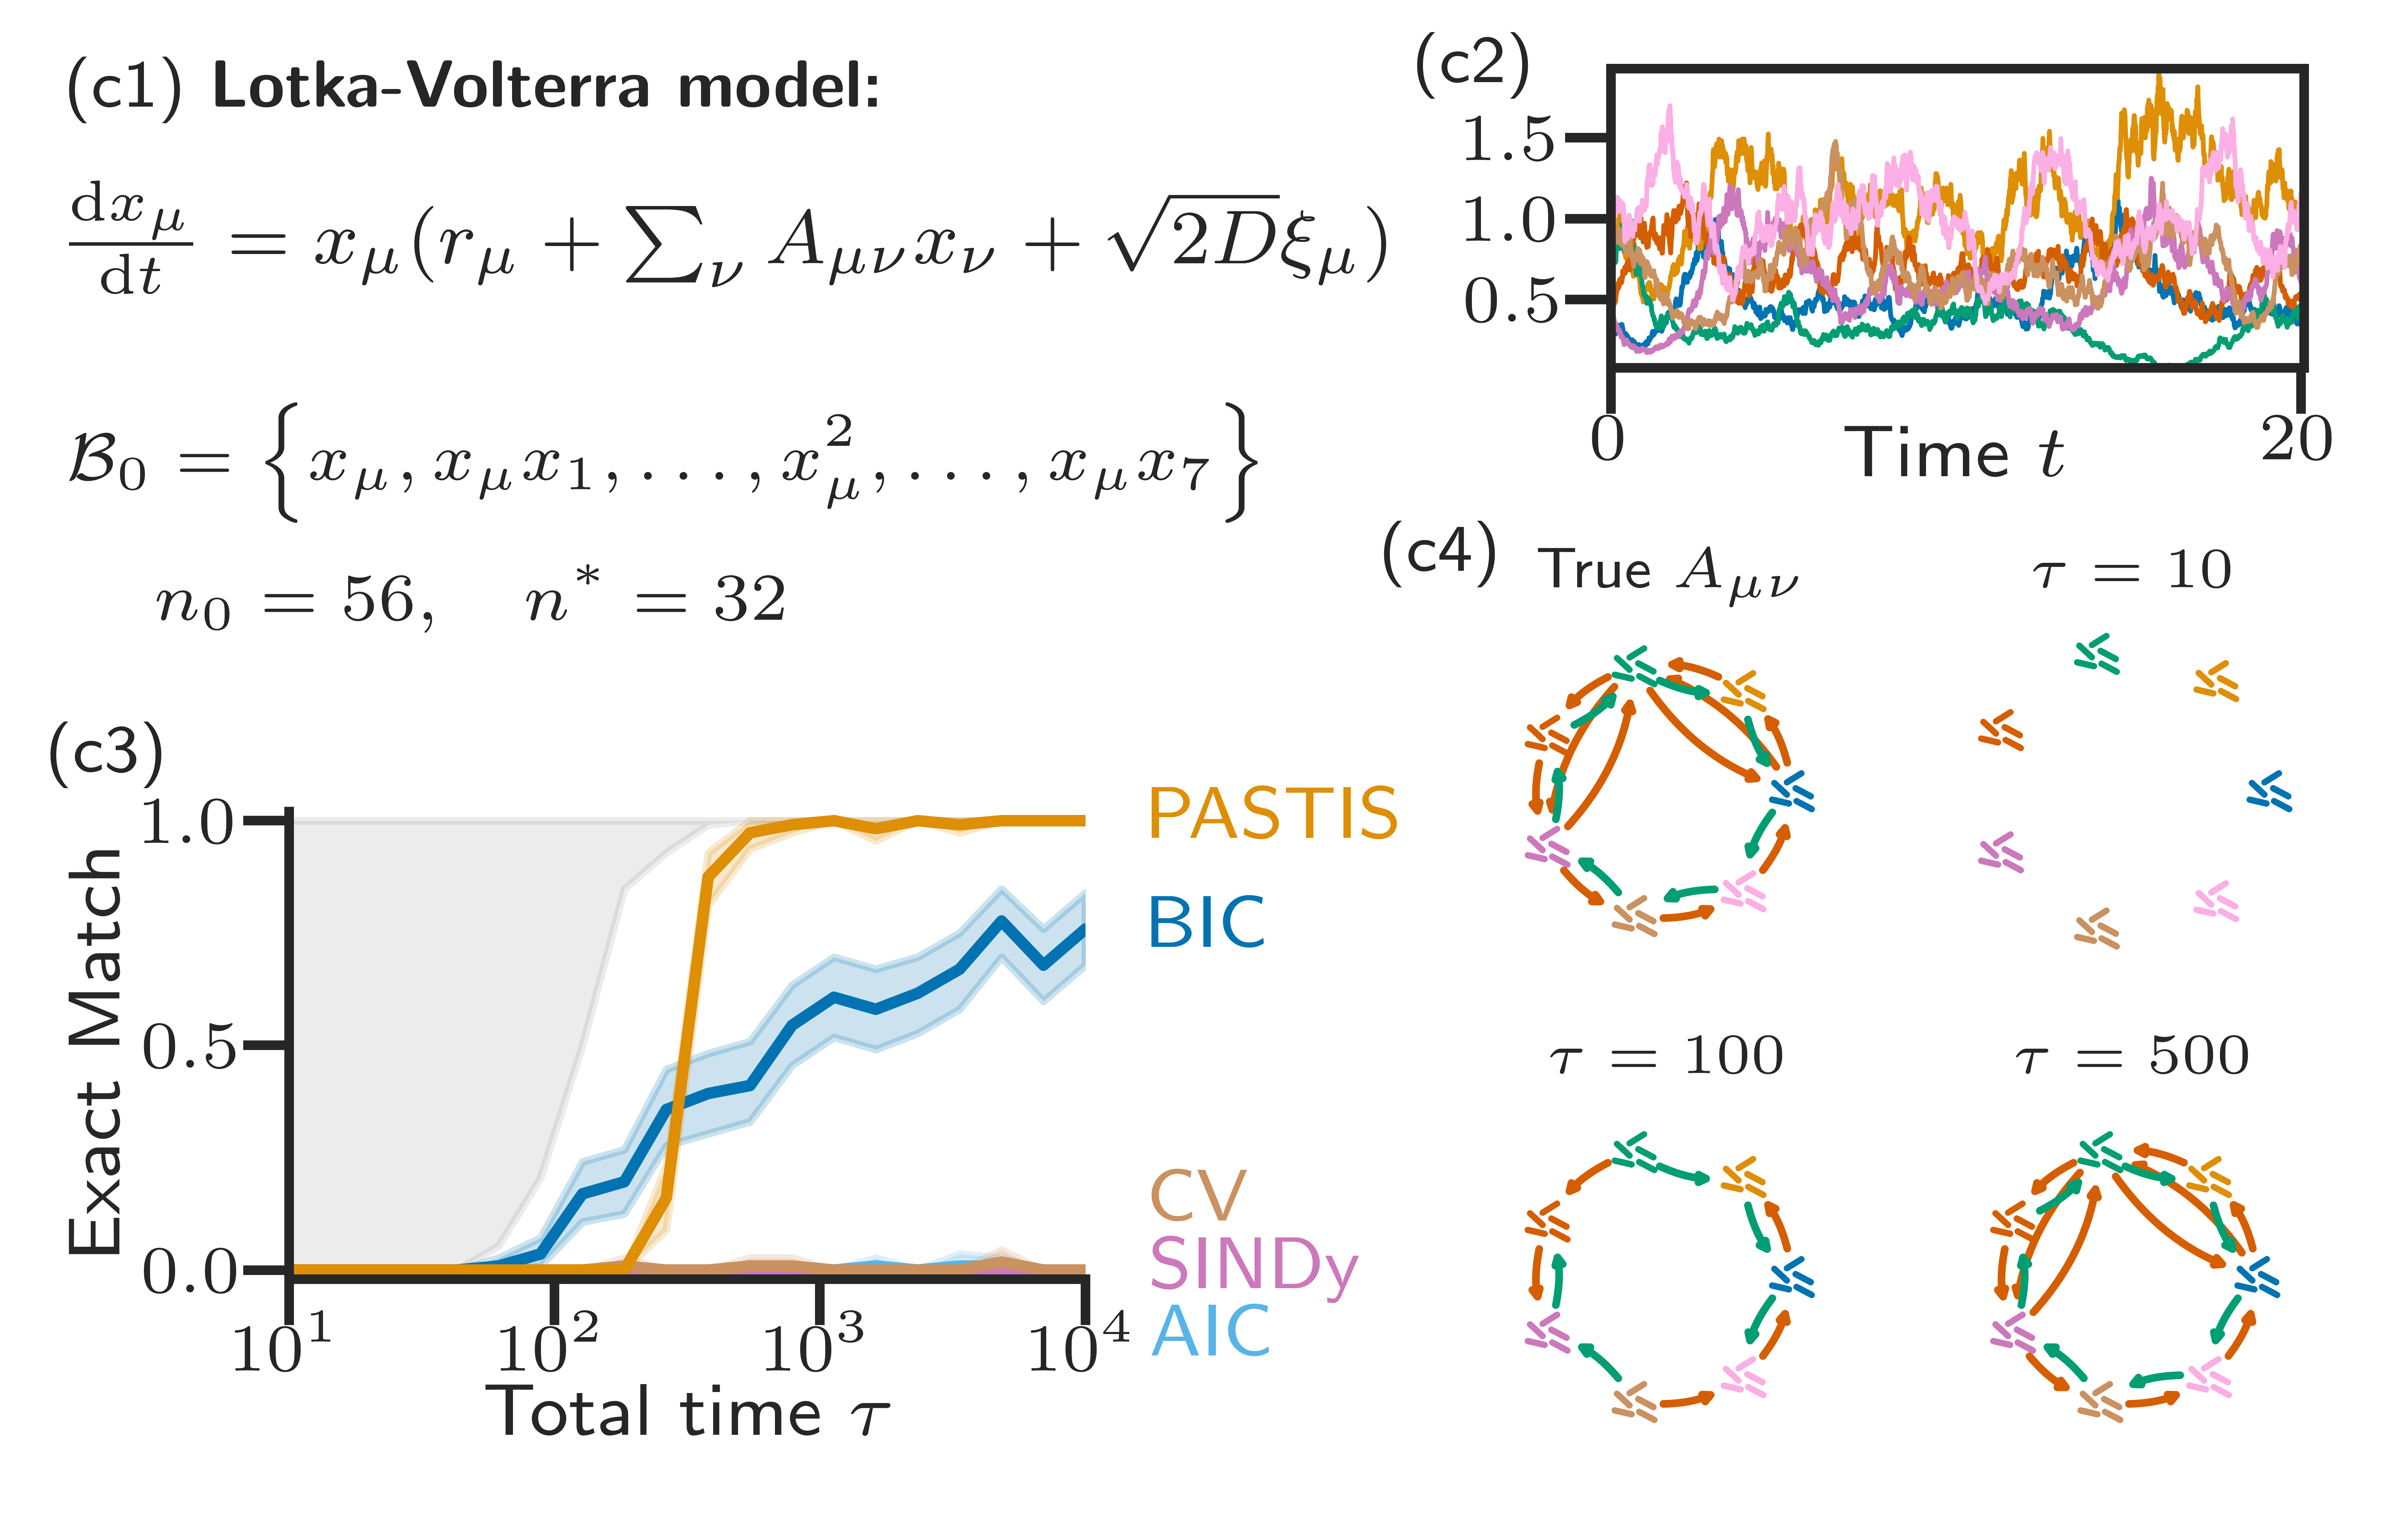

In [12]:
from script_cluster.Lotka_Volterra_simple import model
# import pylustrator
# pylustrator.start()
importlib.reload(plot_error_and_accuracy)
importlib.reload(hf)

ut.set_favorite_plot_config()

def plot_equation_Lotka_Volterra(ax = None, fontsize=7):
    if ax is None:
        fig, ax = plt.subplots()
    equation = r'''$\dv{x_\mu}{t} = x_\mu( r_{\mu} + \sum_\nu A_{\mu\nu} x_{\nu} + \sqrt{2 D}  \xi_\mu)$
    '''
    out = ax.text(0., 1.7, equation, fontsize=fontsize, ha='left', va='top')
    out.set_in_layout(False)
    ax.axis('off')
    return ax

def plot_base(ax=None, fontsize=6):
    if ax is None:
        fig, ax = plt.subplots()
    equation = r"""\begin{align*}\mathcal{B}_0 &= \left\{x_\mu, x_\mu x_1, \dots, x_\mu^2, \dots, x_\mu x_7\right\}\\& n_0 = 56,\quad  n^* = 32\\ \end{align*}
    """
    out = ax.text(0, 1.8, equation, fontsize=fontsize, ha='left', va='top')
    out.set_in_layout(False)
    ax.axis('off')
    return ax

def plot_graph_Lotka_Volterra_from_model_l0(model_l0 : l.L0_SBR, ax = None, fontsize=6):
    if ax is None:
        fig, ax = plt.subplots()
    A = hdg.get_matrix_interaction(model_l0)
    plot_graph_Lotka_Volterra_from_matrix(A, ax=ax)
    ax.set_title(f"$\\tau = {int(model_l0._sffi.tau)}$", fontsize=fontsize)
    #ax.set_in_layout(False)
    return ax

def plot_graph_Lotka_Volterra_from_matrix(A, ax = None, scale_graph=100):
    pos = hdg.draw_graph(A, ax=ax, style_line="-",  alpha=1,  color_special=False, node_size=0, center_graph=(0, 0), scale_graph=scale_graph, width_mult=0.8, size_head=2,
                         show_self_arrow=False, shorten_edges=3)
    hdg.add_images_on_nodes(ax, pos, folder_images="script_figure/images_bacteria/", zoom=0.012)
    #return ax
        

name_csv_time = name_csv_base + "_n.pkl" 
method_to_plot = ["AIC",  "BIC", "CV", "PASTIS", "SINDy",
                "Total model", "True model"]
  
#fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=ut.set_size(width="article", fraction=0.8, subplots=(n_rows, 1)), constrained_layout=False)
fig = plt.figure(figsize=ut.set_size(width="article", fraction=1, subplots=(1, 1)), constrained_layout=True)
gs0 = gridspec.GridSpec(6, 5, figure=fig)
gs_equation = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[:3,:3])
gs_trajectory = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[:2,3:])
gs_exact_match = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[3:,:3])
gs_graph = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs0[2:,3:])

ax_title = fig.add_subplot(gs_equation[0])
ax_title.axis('off')
ax_equation = fig.add_subplot(gs_equation[1])
ax_base = fig.add_subplot(gs_equation[2])

ax_trajectory = fig.add_subplot(gs_trajectory[0])

ax_time_accu = fig.add_subplot(gs_exact_match[0])

ax_graph_0 = fig.add_subplot(gs_graph[0, 0])
ax_graph_1 = fig.add_subplot(gs_graph[0, 1])
ax_graph_2 = fig.add_subplot(gs_graph[1, 0])
ax_graph_3 = fig.add_subplot(gs_graph[1, 1])

fontsize=8
plot_equation_Lotka_Volterra(ax=ax_equation, fontsize=fontsize)
plot_base(ax=ax_base, fontsize=fontsize-1)

plot_trajectory.plot_trajectory_Lotka_Volterra_simple(name_csv_time, model_class, ax=ax_trajectory, parameter="time", parameters_value_plot=[10.1], max_time=20.1, lw=0.5)
#ax_trajectory.set_yticks([0, 1])
plot_error_and_accuracy.plot_from_csv(name_csv_time, parameter="time", method_to_plot=method_to_plot, l_y_plot=["Exact_model_found"], axs=[ax_time_accu],
                                  add_legend_on_line=True, verbose=True, min_x_axis=10)
plot_error_and_accuracy.add_pareto_zone(ax_time_accu, name_csv_time, two_zone_plot=False)


ax_trajectory.set_xlabel(r"Time $t$", labelpad=-5)
ax_time_accu.set_xlabel(r"Total time $\tau$", labelpad=0)

fontsize=6
plot_graph_Lotka_Volterra_from_matrix(model.A, ax=ax_graph_0)
ax_graph_0.set_title(r"True $A_{\mu \nu}$", fontsize=fontsize)
plot_graph_Lotka_Volterra_from_model_l0(model_l0_n_1, ax=ax_graph_1, fontsize=fontsize)
plot_graph_Lotka_Volterra_from_model_l0(model_l0_n_2, ax=ax_graph_2, fontsize=fontsize)
plot_graph_Lotka_Volterra_from_model_l0(model_l0_n_3, ax=ax_graph_3, fontsize=fontsize)

hf.add_letter(ax_title, "c1", y=0.7, x=0, title="Lotka-Volterra model: ")
hf.add_letter(ax_trajectory, "c2", x=-0.28, y= 0.9)
hf.add_letter(ax_time_accu, "c3")
hf.add_letter(ax_graph_0, "c4", y=1.2, x=-0.2)

#ax_time_accu.set_xticks([10**1, 10**2, 10**3, 10**4])
# ax_time_accu.set_xlim(10, 10**4)


# plt.figure(1).axes[2].set(position=[0.04856, 0.4455, 0.3498, 0.2611])
# plt.figure(1).axes[3].set(position=[0.5063, 0.453, 0.3498, 0.2611])
# plt.figure(1).axes[4].set(position=[0.01235, 0.03429, 0.2253, 0.1939], xlim=(-208.7, 218.6))
# plt.figure(1).axes[5].set(position=[0.2624, 0.0405, 0.2253, 0.1939], xlim=(-189.3, 199.2))
# plt.figure(1).axes[6].set(position=[0.5124, 0.03678, 0.2253, 0.1939], xlim=(-208.7, 218.6))

plt.savefig("figures/lotka_square.png", bbox_inches='tight')
plt.savefig("figures/lotka_square.pdf", bbox_inches='tight')